In [81]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from skimage import data

-0.01751564455927847 9.991753384158555
psnr_high_noise: 21.206548134113902
-0.042685689538516015 100.06201938137836
psnr_high_noise: 11.417243314417984


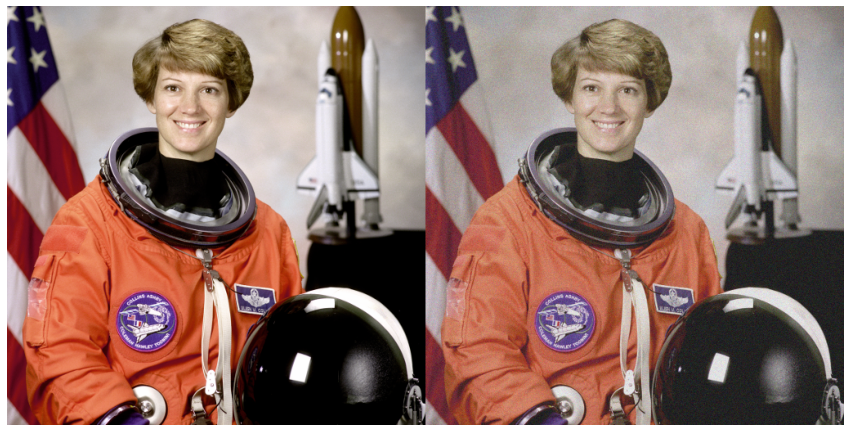

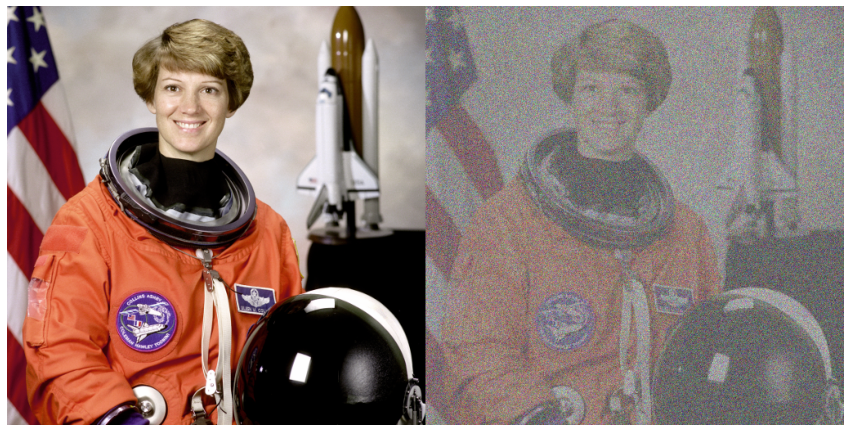

In [142]:
# Gaussian Noise
def add_gaussian_noise( src, sigma = 1.):
  gaussian_noise = np.random.normal(size=src.shape,loc=0., scale=sigma)
  print(np.mean(gaussian_noise), np.std(gaussian_noise))
  noisy_image = src+gaussian_noise
  noisy_image = cv2.normalize(noisy_image,  noisy_image, 0, 255, cv2.NORM_MINMAX)
  noisy_image = noisy_image.astype(np.uint8)
  return noisy_image

astro = data.astronaut()
# astro = cv2.cvtColor(astro,cv2.COLOR_RGB2GRAY)
astro_noise_low = add_gaussian_noise(astro, 10)
plt.figure(figsize=(15,30))
plt.imshow(np.concatenate((astro,astro_noise_low),axis=1))
plt.axis('off')

psnr_low_noise = cv2.PSNR(astro,astro_noise_low)
print('psnr_high_noise:',psnr_low_noise )

astro_noise_high = add_gaussian_noise(astro, 100)
plt.figure(figsize=(15,30))
plt.imshow(np.concatenate((astro,astro_noise_high),axis=1))
plt.axis('off')

psnr_high_noise = cv2.PSNR(astro,astro_noise_high)
print('psnr_high_noise:',psnr_high_noise )

In [82]:
# Poission Noise
def add_poisson_noise( src, cnt_ratio = 0.1):
  src_lowcnt = src*cnt_ratio
  poisson_noise = np.random.poisson(src_lowcnt).astype(np.float32)
  noisy_image = poisson_noise
  noisy_image = cv2.normalize(noisy_image,  noisy_image, 0, 255, cv2.NORM_MINMAX)
  noisy_image = noisy_image.astype(np.uint8)
  return noisy_image

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  This is separate from the ipykernel package so we can avoid doing imports until


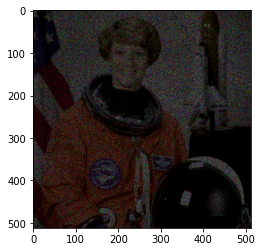

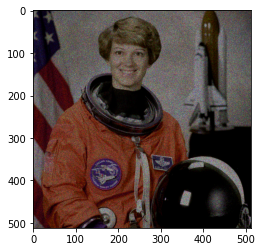

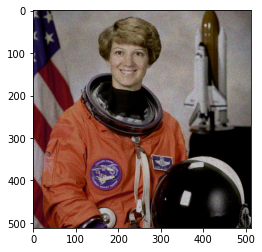

In [114]:
astro = data.astronaut()
# astro = cv2.cvtColor(astro,cv2.COLOR_RGB2GRAY)
astro_float = astro.astype(float)

astro_noise_high = add_poisson_noise(astro_float, 0.01)
plt.figure()
plt.imshow(astro_noise_high)

astro_noise_medium = add_poisson_noise(astro_float, 0.1)
plt.figure()
plt.imshow(astro_noise_medium)

astro_noise_low = add_poisson_noise(astro_float, 0.5)
plt.figure()
plt.imshow(astro_noise_low)

In [115]:
?cv2.PSNR

In [116]:
import math

def psnr(img1, img2):
  i1 = img1.astype(float)
  i2 = img2.astype(float)
  mse = np.mean((i1 - i2) ** 2)
  if mse == 0:
    return 100
  PIXEL_MAX = 255.
  return 10 * math.log10(PIXEL_MAX**2 / mse)

In [117]:
astro.dtype

dtype('uint8')

In [118]:
astro_noise_high.dtype

dtype('uint8')

In [119]:
psnr_high_noise = cv2.PSNR(astro,astro_noise_high ,255)
psnr_medium_noise = cv2.PSNR(astro,astro_noise_medium)
psnr_low_noise = cv2.PSNR(astro,astro_noise_low)

print('psnr_high_noise:',psnr_high_noise    , '/',psnr(astro,astro_noise_high))
print('psnr_medium_noise:',psnr_medium_noise, '/',psnr(astro,astro_noise_medium))
print('psnr_low_noise:',psnr_low_noise      , '/',psnr(astro,astro_noise_low))

psnr_high_noise: 7.228614546121519 / 7.228614546121522
psnr_medium_noise: 11.40143749709945 / 11.401437497099447
psnr_low_noise: 16.312273385438523 / 16.312273385438523


In [120]:
?cv2.PSNR

psnr_high_noise_filtered: 11.147967957712419


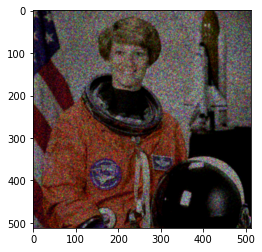

In [121]:
filtered_high_noise = cv2.blur(src=astro_noise_high,ksize=(3,3),
                               # borderType=cv2.BORDER_REFLECT
                               )
filtered_high_noise = cv2.normalize(filtered_high_noise,  filtered_high_noise, 0, 255, cv2.NORM_MINMAX)
psnr_high_noise_filtered = cv2.PSNR(astro,filtered_high_noise)
print('psnr_high_noise_filtered:',psnr_high_noise_filtered)
plt.imshow(filtered_high_noise)

psnr_medium_noise_filtered: 18.743914273908878


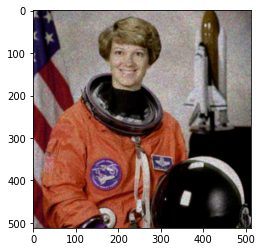

In [122]:
filtered_medium_noise = cv2.blur(src=astro_noise_medium,ksize=(3,3),
                               # borderType=cv2.BORDER_REFLECT
                               )
filtered_medium_noise = cv2.normalize(filtered_medium_noise,  filtered_medium_noise, 0, 255, cv2.NORM_MINMAX)
psnr_medium_noise_filtered = cv2.PSNR(astro,filtered_medium_noise)
print('psnr_medium_noise_filtered:',psnr_medium_noise_filtered)
plt.imshow(filtered_medium_noise)

psnr_low_noise_filtered: 23.668510848735266


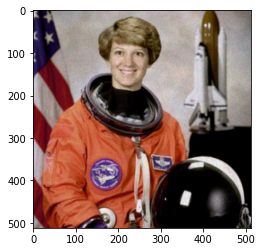

In [123]:
filtered_low_noise = cv2.blur(src=astro_noise_low,ksize=(3,3),
                               # borderType=cv2.BORDER_REFLECT
                               )
filtered_low_noise = cv2.normalize(filtered_low_noise,  filtered_low_noise, 0, 255, cv2.NORM_MINMAX)
psnr_low_noise_filtered = cv2.PSNR(astro,filtered_low_noise)
print('psnr_low_noise_filtered:',psnr_low_noise_filtered)
plt.imshow(filtered_low_noise)

psnr_high_noise_filtered: 11.876577781847391


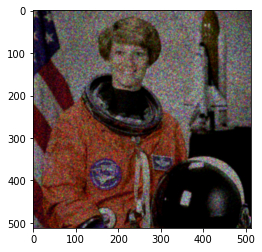

In [124]:
Gaussian_img = cv2.GaussianBlur(astro_noise_high, ksize=(5,5) ,
                                sigmaX=0
)
Gaussian_img = cv2.normalize(Gaussian_img,  Gaussian_img, 0, 255, cv2.NORM_MINMAX)
psnr_high_noise_filtered = cv2.PSNR(astro,Gaussian_img)
print('psnr_high_noise_filtered:',psnr_high_noise_filtered)

plt.imshow(Gaussian_img)